In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15, 15)

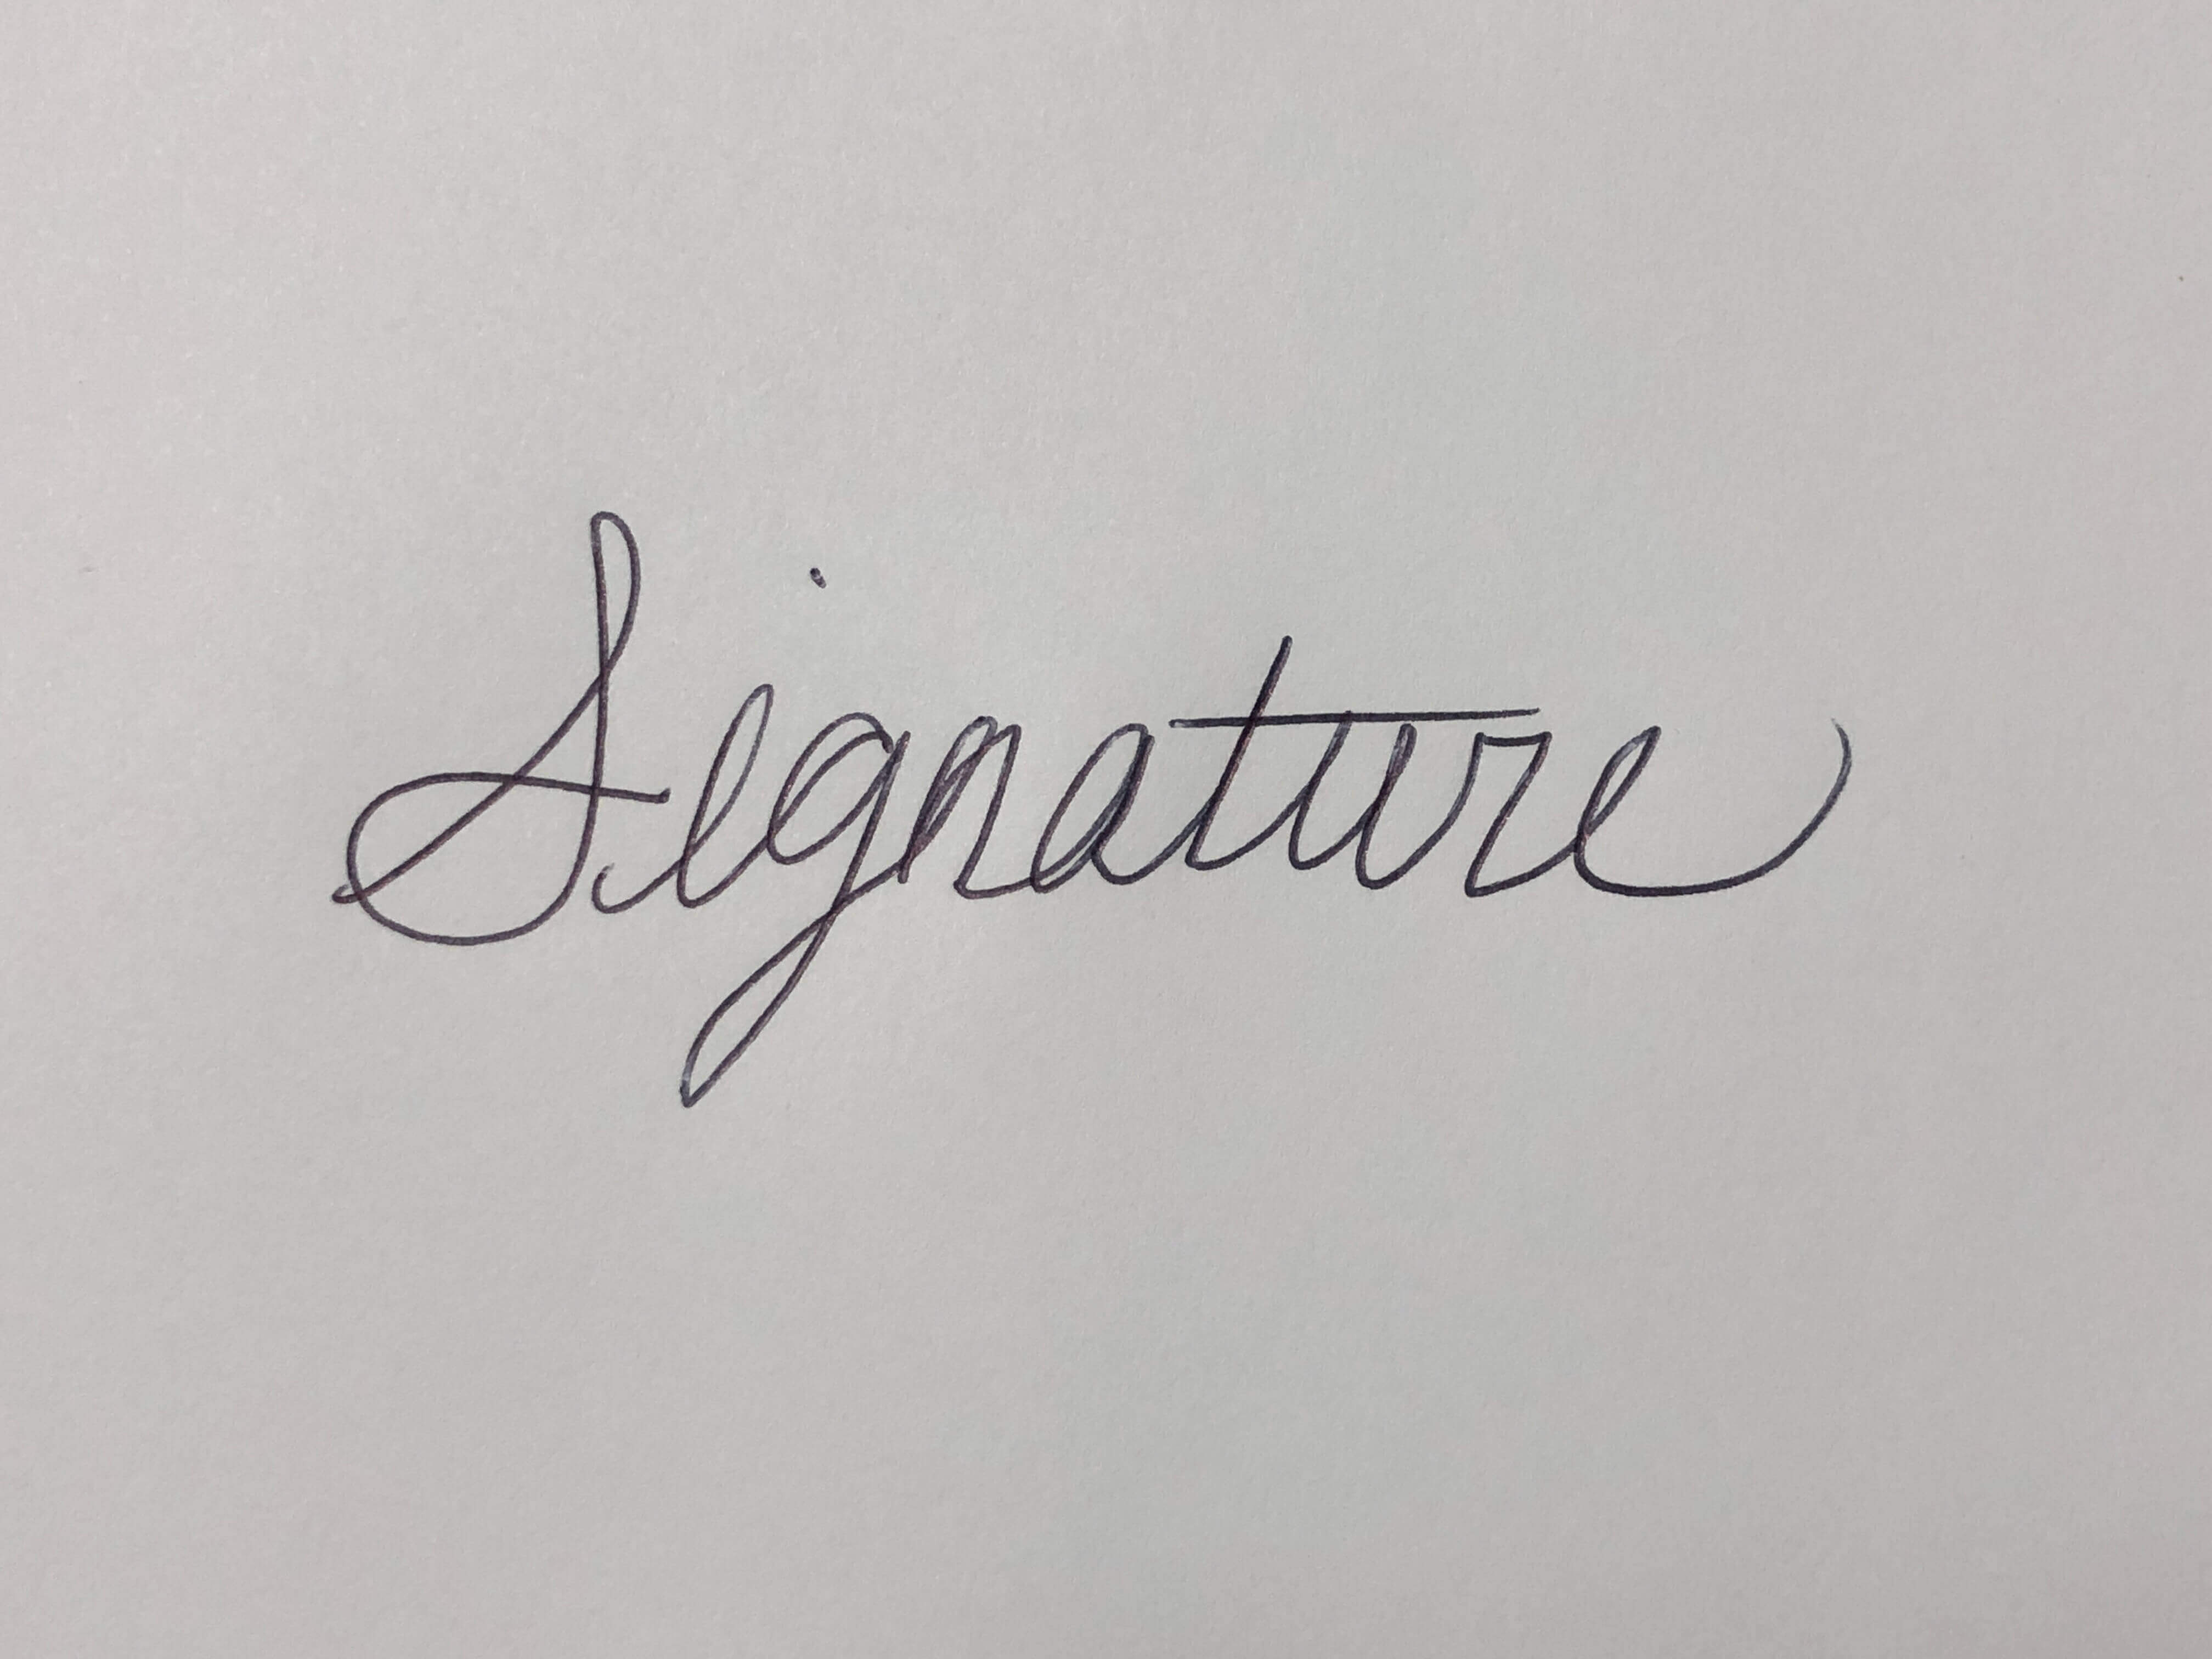

In [10]:
original_signature = cv2.imread('signature.jpg', cv2.IMREAD_COLOR)

Image('signature.jpg', width=400)

Text(0.5, 1.0, 'Sample Signature')

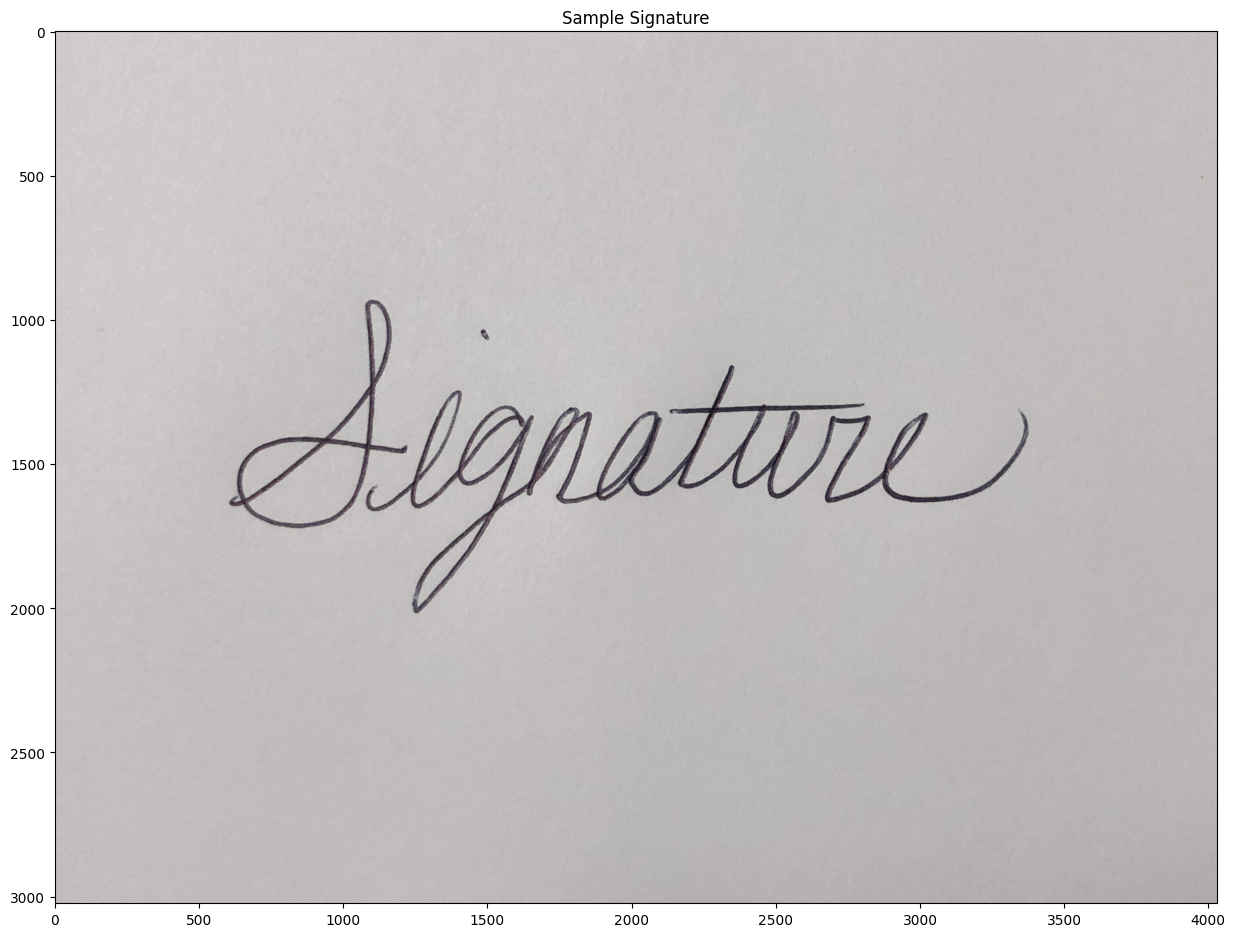

In [11]:
plt.imshow(original_signature[:,:,::-1])
plt.title('Sample Signature')

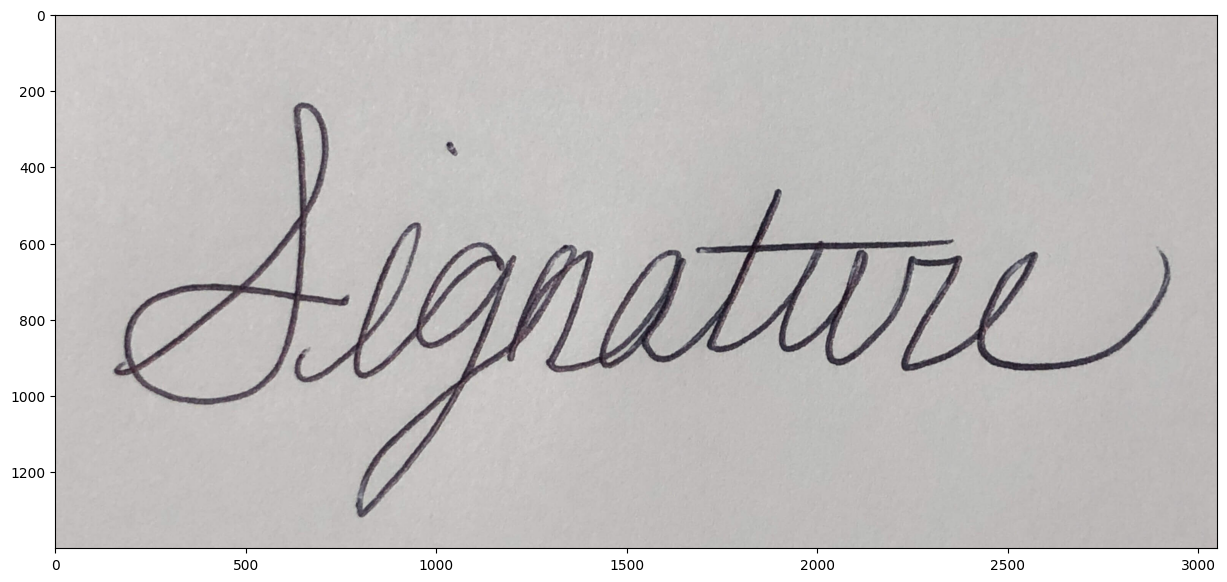

In [13]:
signature = original_signature[700:2100, 450:3500, :]
plt.imshow(signature[:,:,::-1])

Text(0.5, 1.0, 'Grayscale Signature')

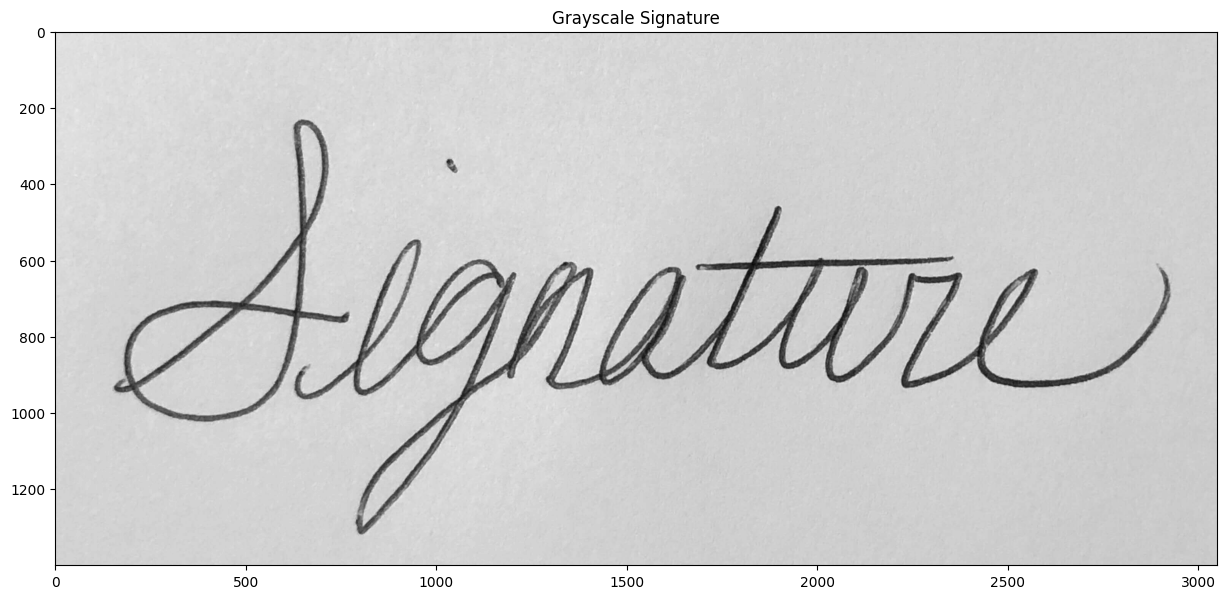

In [15]:
gray_signature = cv2.cvtColor(signature, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_signature)
plt.title('Grayscale Signature')

Text(0.5, 1.0, 'Alpha Mask')

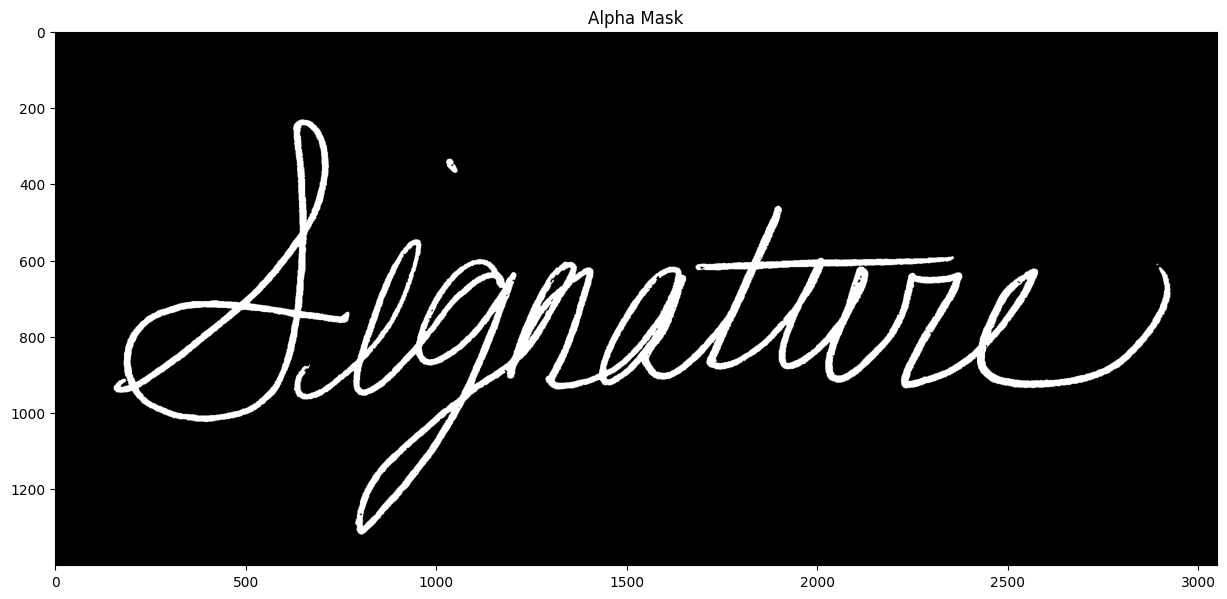

In [16]:
ret, aplha_mask = cv2.threshold(gray_signature, 150, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite('alpha_mask.jpg', aplha_mask)
plt.imshow(aplha_mask)
plt.title('Alpha Mask')

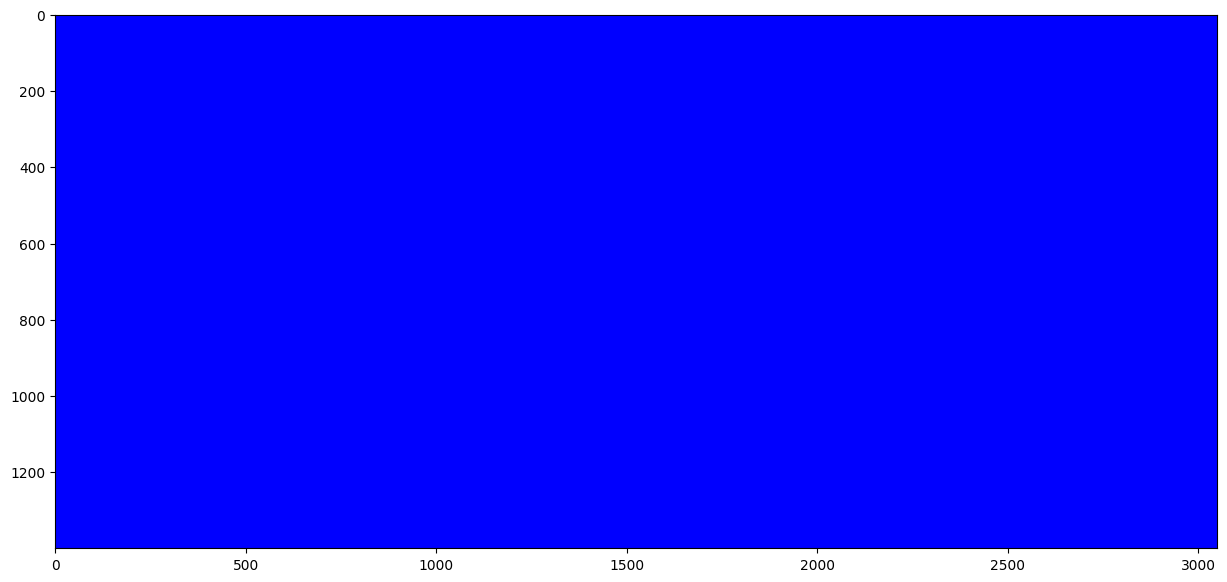

In [17]:
blue_mask = signature.copy()
blue_mask[:, :] = (255, 0, 0)
plt.imshow(blue_mask[:,:,::-1])

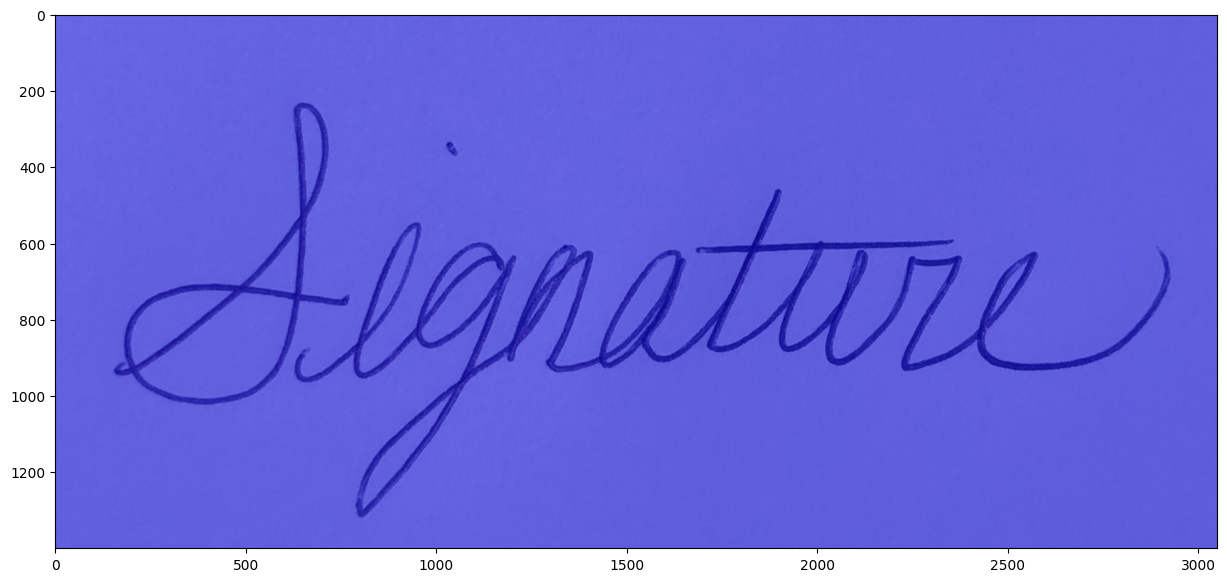

In [18]:
color_signature = cv2.addWeighted(signature, 0.5, blue_mask, 0.5, 0)
plt.imshow(color_signature[:,:,::-1])

In [19]:
b, g, r = cv2.split(color_signature)
print(b.shape, g.shape, r.shape)

(1400, 3050) (1400, 3050) (1400, 3050)


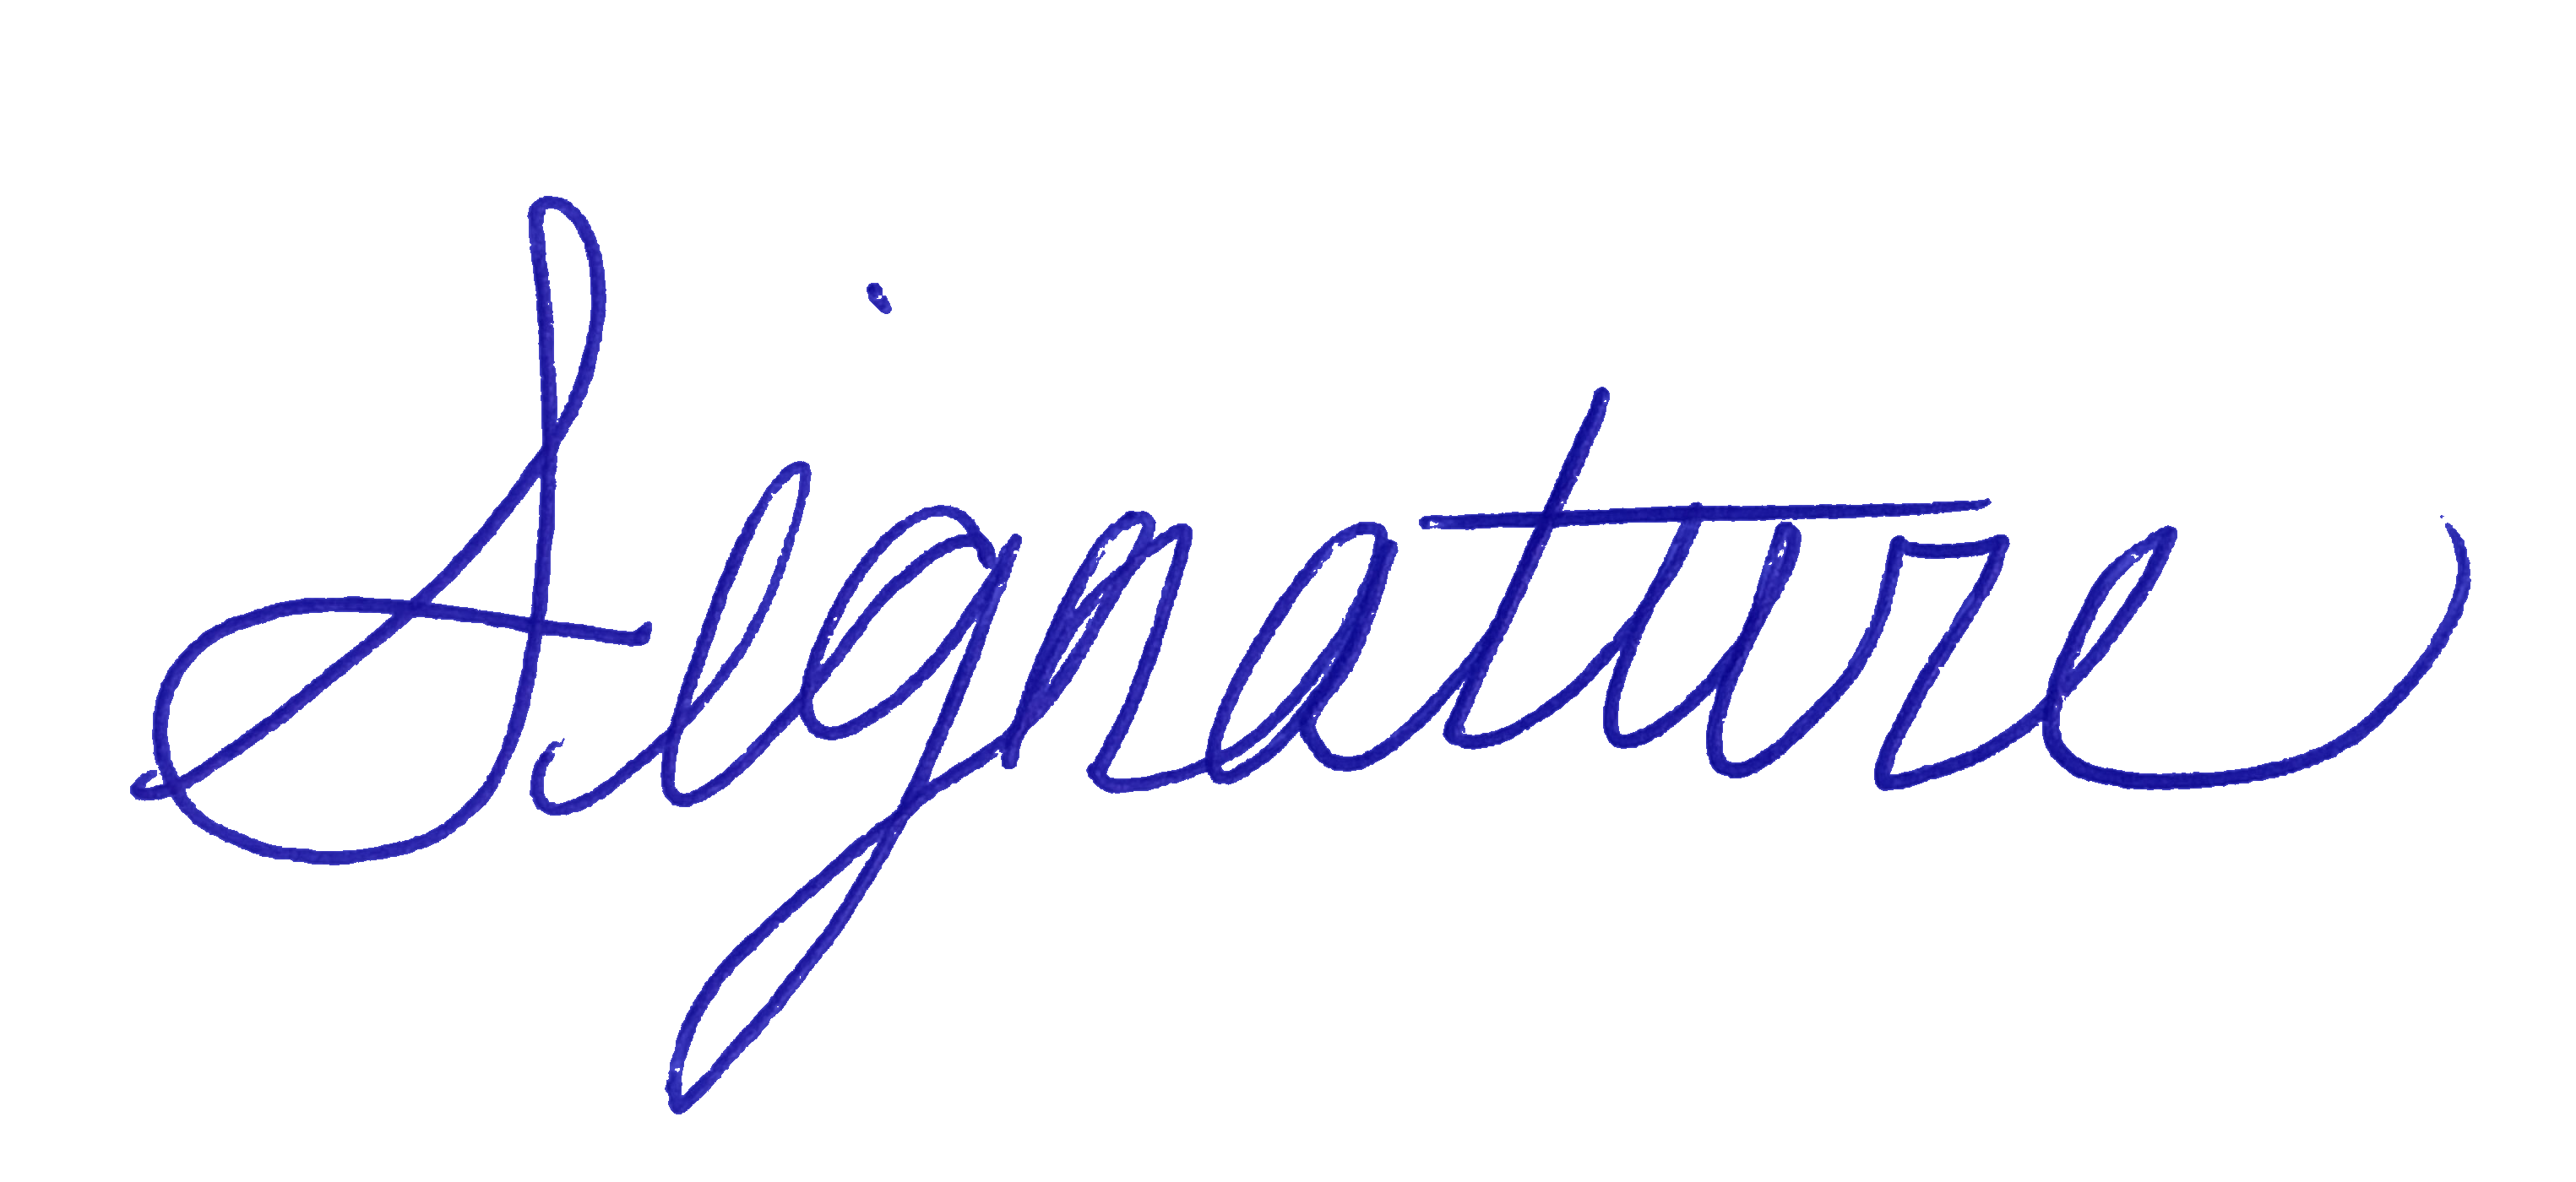

In [20]:
new = [b, g, r, aplha_mask]

png = cv2.merge(new, 4)

cv2.imwrite('extracted_signature.png', png)

Image('extracted_signature.png', width=400)